In [1]:
!pip install tensorflow-gpu

In [2]:
!pip install opencv-python

In [3]:
!pip install opencv-contrib-python

In [4]:
!pip install matplotlib

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Training/0/Training_13145953.jpg")

In [4]:
img_array.shape

(48, 48, 3)

In [5]:
print (img_array)

[[[213 213 213]
  [218 218 218]
  [173 173 173]
  ...
  [123 123 123]
  [111 111 111]
  [108 108 108]]

 [[217 217 217]
  [218 218 218]
  [192 192 192]
  ...
  [115 115 115]
  [113 113 113]
  [104 104 104]]

 [[225 225 225]
  [184 184 184]
  [123 123 123]
  ...
  [121 121 121]
  [112 112 112]
  [104 104 104]]

 ...

 [[ 61  61  61]
  [ 59  59  59]
  [ 59  59  59]
  ...
  [100 100 100]
  [ 70  70  70]
  [ 78  78  78]]

 [[ 55  55  55]
  [ 54  54  54]
  [ 57  57  57]
  ...
  [194 194 194]
  [132 132 132]
  [ 70  70  70]]

 [[ 56  56  56]
  [ 58  58  58]
  [ 55  55  55]
  ...
  [163 163 163]
  [179 179 179]
  [141 141 141]]]


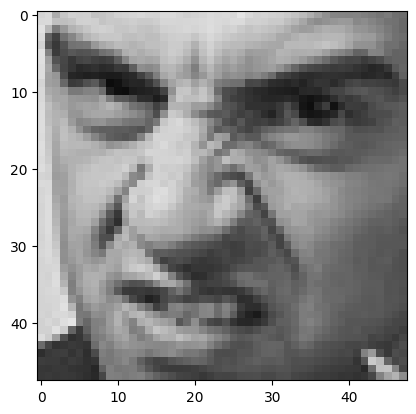

In [6]:
plt.imshow(img_array)

In [7]:
Datadirectory = "Training/"

In [8]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

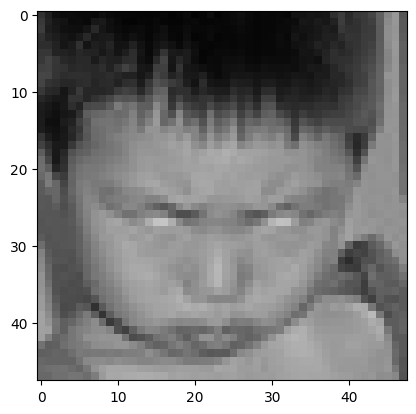

In [9]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()   
        break  
    break   

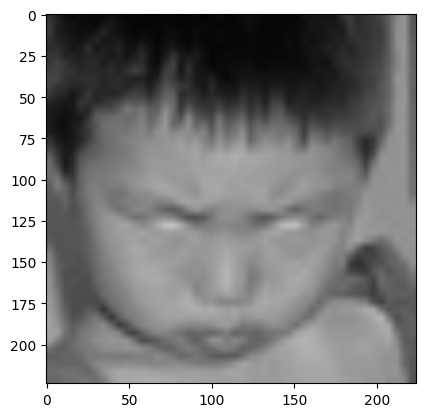

In [10]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [13]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                  pass  

In [14]:
create_training_Data()

In [17]:
print (len(training_Data))

5117


In [18]:
temp = np.array(training_Data)

C:\Users\Ankel\AppData\Local\Temp\ipykernel_14264\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(training_Data)


In [19]:
temp.shape

(5117, 2)

Probar webCam

In [20]:
import random
random.shuffle(training_Data)

In [16]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)   



In [19]:
X.shape

(5117, 224, 224, 3)

In [20]:
#normalizar datos
X = X / 255.0

In [21]:
y[1000]

2

In [22]:
y[0]

0

In [23]:
Y = np.array(y)

In [24]:
Y.shape

(5117,)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
model = tf.keras.applications.MobileNetV2()

In [27]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [28]:
base_input = model.layers[0].input

In [29]:
base_output =model.layers[-2].output

In [30]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [31]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [32]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [33]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [34]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [35]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
Y[1000]

2

In [37]:
new_model.fit(X, Y, epochs = 1)

160/160 [==============================] - 1180s 7s/step - loss: 1.6367 - accuracy: 0.3947


In [38]:
new_model.save('Final_model_95p07.h5')

In [40]:
!pip install tensorflowjs

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ------------------ ------------------- 41.0/85.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 85.1/85.1 kB 959.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ------------------------ ------------- 122.9/189.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 189.9/189.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/100.6 kB ? eta -:--:--
     -------------------------------------- 100.6/100.6 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ---------------------------------------- 85.1/85.1 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/226.1 kB ? eta -:--:--
     

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\Ankel\\anaconda3\\envs\\pytthon_puro\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [44]:
!tensorflowjs_converter --input_format keras Final_model_95p07.h5 ./

"tensorflowjs_converter" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [7]:
frame = cv2.imread("enojada_test.jpg")

In [8]:
frame.shape

(1080, 1920, 3)

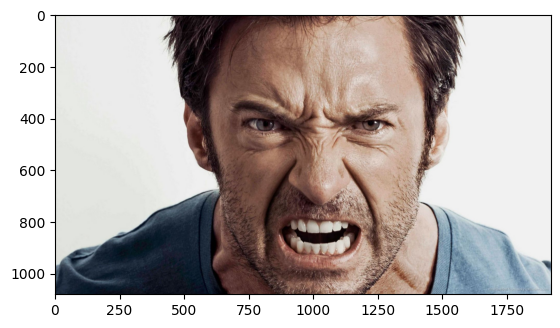

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [11]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [12]:
gray.shape

(1080, 1920)

In [13]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print ("Rostro no Detectado")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

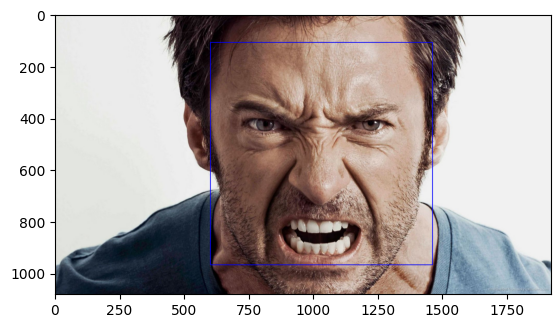

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

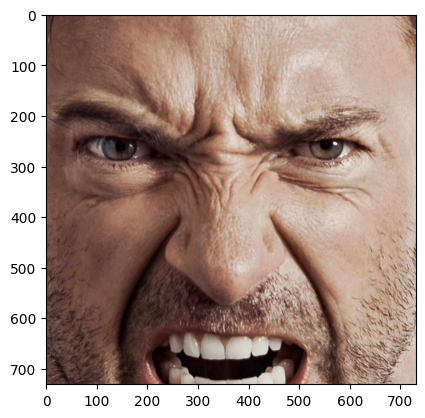

In [15]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [16]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255.0 

In [17]:
Predictions = new_model.predict(final_image)

In [18]:
Predictions[0]

array([1.4413830e-06, 3.9323062e-08, 4.9360335e-04, 6.1627652e-05,
       7.7153520e-05, 8.8947536e-06, 9.9935728e-01], dtype=float32)

In [19]:
np.argmax(Predictions)

6

In [20]:
import cv2 # pip install opencv-python
#pip install opencv-contrib-python full package
#from deepface import DeepFace #pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")
while True:
  ret, frame = cap.read()
  #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(faceCascade.empty())
  faces = faceCascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not detected")
    else:
      for (ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
    
  final_image = cv2.resize(face_roi, (224,224))
  final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
  final_image = final_image/255.0
  font = cv2.FONT_HERSHEY_SIMPLEX
  Predictions = new_model.predict(final_image)
  font_scale = 1.5
  font = cv2.FONT_HERSHEY_PLAIN
  if(np.argmax(Predictions)==0):
      status = "Angry"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  elif (np.argmax(Predictions)==1):
      status = "Disgust"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  elif (np.argmax(Predictions)==2):
      status = "Fear"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
    
  elif (np.argmax(Predictions)==3):
      status = "Happy"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  elif (np.argmax(Predictions)==4):
      status = "Sad"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  elif (np.argmax(Predictions)==5):
      status = "Surprise"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  else:
      status = "Neutral"
      x1,y1,w1,h1 = 0,0,175,75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
      #Addd text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))
  cv2.imshow('Face Emotion Recognition', frame)
  if cv2.waitKey(2) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()